In [195]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

Download the data from https://archive.ics.uci.edu/ml/datasets/Heart+Disease

In [196]:
df = pd.read_csv("heart.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


#Data preprocessing : One Hot Encoding
Machines can understand binary better than text and number.  and therefore  I converted the categorical data such as resting electrocardiographic results , the slope of the peak exercise ST segment ,chest pain type to binary format in order for the machine to process them using mathematical equations.

In [197]:
#Preprocessing
def onehot(ser, num_classes=None):
    """
    One-hot encode the series.
    Example: 
    >>> onehot([1, 0, 2], 3)
    array([[0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.]])
    """
    if num_classes == None:
        num_classes = len(np.unique(ser))
    return np.identity(num_classes)[ser]

new_col_names = []
need_encode_col = ["restecg", "thal", "slope", "cp"]
no_encode_col = [col for col in df.columns if col not in need_encode_col]
new_df = df[no_encode_col]
for col in need_encode_col:
    num_classes = len(df[col].unique())
    new_col_names = [f"{col}_{i}" for i in range(num_classes)]
    encoded = pd.DataFrame(onehot(df[col], num_classes), columns=new_col_names, dtype=int)
    new_df = pd.concat([new_df, encoded], axis=1)
new_df.head()

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,ca,target,restecg_0,restecg_1,restecg_2,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2,cp_0,cp_1,cp_2,cp_3
0,63,1,145,233,1,150,0,2.3,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,1
1,37,1,130,250,0,187,0,3.5,0,1,0,1,0,0,0,1,0,1,0,0,0,0,1,0
2,41,0,130,204,0,172,0,1.4,0,1,1,0,0,0,0,1,0,0,0,1,0,1,0,0
3,56,1,120,236,0,178,0,0.8,0,1,0,1,0,0,0,1,0,0,0,1,0,1,0,0
4,57,0,120,354,0,163,1,0.6,0,1,0,1,0,0,0,1,0,0,0,1,1,0,0,0


The attributes including age, sex,chest pain type (4 values),resting blood pressure, serum cholestoral , fasting blood sugar ,resting electrocardiographic results ,maximum heart rate achieved, exercise induced angina,oldpeak = ST depression induced by exercise relative to rest,the slope of the peak exercise ST segment, number of major vessels (0-3) colored by flourosopy were used to define train and test the model.


In [198]:
data_cols = [col for col in new_df.columns if col != "target"]

print(data_cols)

['age', 'sex', 'trestbps', 'chol', 'fbs', 'thalach', 'exang', 'oldpeak', 'ca', 'restecg_0', 'restecg_1', 'restecg_2', 'thal_0', 'thal_1', 'thal_2', 'thal_3', 'slope_0', 'slope_1', 'slope_2', 'cp_0', 'cp_1', 'cp_2', 'cp_3']


In [199]:

X = new_df.drop(['target'],axis='columns')
X.head(3)
X.shape


(303, 23)

In [200]:
X.columns

Index(['age', 'sex', 'trestbps', 'chol', 'fbs', 'thalach', 'exang', 'oldpeak',
       'ca', 'restecg_0', 'restecg_1', 'restecg_2', 'thal_0', 'thal_1',
       'thal_2', 'thal_3', 'slope_0', 'slope_1', 'slope_2', 'cp_0', 'cp_1',
       'cp_2', 'cp_3'],
      dtype='object')

In [201]:

from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

new_df_shfl = shuffle(new_df, random_state=443)
# define X and y
X = new_df_shfl[data_cols].values
y = new_df_shfl["target"].values
# split X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.25, random_state=80)


#KNN Algorithm

In [202]:
# train KNeighborsClassifier model on the training set
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)
y_pred_knn = classifier.predict(X_test)

# make class predictions for the testing set
knn_probs = classifier.predict_proba(X_test)
knn_probs = knn_probs[:, 1]



Confusion matrix

Table that describes the performance of a classification model
Every observation in the testing set is represented in exactly one box
It's a 2x2 matrix because there are 2 response classes 



Basic terminology

1.    True Positives (TP): we correctly predicted that they do have heart diease
2.      True Negatives (TN): we correctly predicted that they don't have heart diease
3.    False Positives (FP): we incorrectly predicted that they do have heart diease(a "Type I error")
4.    False Negatives (FN): we incorrectly predicted that they don't have heart diease (a "Type II error")








In [203]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, y_pred_knn)
print("Confusion Matrix:")
print(result)


Confusion Matrix:
[[12 15]
 [ 3 31]]




Classification Accuracy: Overall, how often is the classifier correct?


* Accuracy : number of correctly predicted data points out of all the data points
* Precision : quantifies the number of positive class predictions that actually belong to the positive class.
* Recall : quantifies the number of positive class predictions made out of all positive examples in the dataset.
* F-Measure : provides a single score that balances both the concerns of precision and recall in one number.


#Classification accuracy for KNN

In [204]:
result1 = classification_report(y_test, y_pred_knn)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test,y_pred_knn)
print("Accuracy:",result2)

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.44      0.57        27
           1       0.67      0.91      0.78        34

    accuracy                           0.70        61
   macro avg       0.74      0.68      0.67        61
weighted avg       0.73      0.70      0.68        61

Accuracy: 0.7049180327868853


#SVM model

In [205]:
#Import svm model
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel
clf = svm.SVC(probability=True)
#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred_svm = clf.predict(X_test)

svm_probs = clf.predict_proba(X_test)
svm_probs = svm_probs[:, 1]


#Classification accuracy for SVM


In [206]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, y_pred_svm)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, y_pred_svm)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test,y_pred_svm)
print("Accuracy:",result2)

Confusion Matrix:
[[12 15]
 [ 2 32]]
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.44      0.59        27
           1       0.68      0.94      0.79        34

    accuracy                           0.72        61
   macro avg       0.77      0.69      0.69        61
weighted avg       0.76      0.72      0.70        61

Accuracy: 0.7213114754098361


ROC Curves and Area Under the Curve (AUC)

Question: Wouldn't it be nice if we could see how sensitivity and specificity are affected by various thresholds, without actually changing the threshold?



* ROC curve can help you to choose a threshold that balances sensitivity and 
specificity in a way that makes sense for your particular context

* You can't actually see the thresholds used to generate the curve on the ROC curve itself



#Comparison the performance of knn and svm algorithm by AUC

Support Vector Machine: ROC AUC=0.763
k nearest neighbor: ROC AUC=0.738


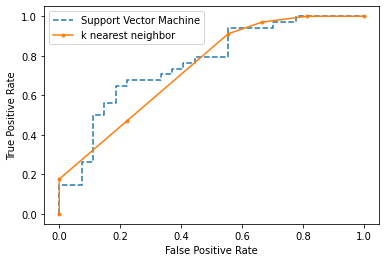

In [207]:
# calculate scores
svm_auc = roc_auc_score(y_test, svm_probs)
knn_auc = roc_auc_score(y_test, knn_probs)
# summarize scores
print('Support Vector Machine: ROC AUC=%.3f' % (svm_auc))
print('k nearest neighbor: ROC AUC=%.3f' % (knn_auc))
# calculate roc curves
svm_fpr, svm_tpr, _ = roc_curve(y_test, svm_probs)
knn_fpr, knn_tpr, _ = roc_curve(y_test, knn_probs)
# plot the roc curve for the model
pyplot.plot(svm_fpr, svm_tpr, linestyle='--', label='Support Vector Machine')
pyplot.plot(knn_fpr, knn_tpr, marker='.', label='k nearest neighbor')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

#Naive Bayes model

In [208]:
##Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
gnb = GaussianNB()

#Train the model using the training sets
gnb.fit(X_train, y_train)

#Predict the response for test dataset
y_pred_nb = gnb.predict(X_test)

nb_probs = gnb.predict_proba(X_test)
nb_probs = nb_probs[:, 1]

#Classification accuracy for Naive Bayes model

In [209]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, y_pred_nb)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, y_pred_nb)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test,y_pred_nb)
print("Accuracy:",result2)

Confusion Matrix:
[[24  3]
 [ 9 25]]
Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.89      0.80        27
           1       0.89      0.74      0.81        34

    accuracy                           0.80        61
   macro avg       0.81      0.81      0.80        61
weighted avg       0.82      0.80      0.80        61

Accuracy: 0.8032786885245902


#Comparison the performance of Gaussian Naive Bayes and svm algorithm by AUC

Gaussian Naive Bayes model: ROC AUC=0.861
Support Vector Machine: ROC AUC=0.763


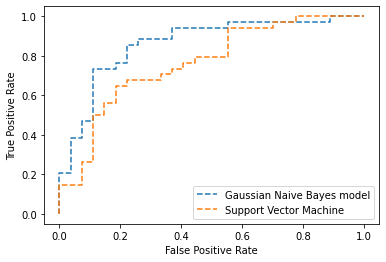

In [210]:
# calculate scores
nb_auc = roc_auc_score(y_test, nb_probs)
svm_fpr, svm_tpr, _ = roc_curve(y_test, svm_probs)
# summarize scores
print('Gaussian Naive Bayes model: ROC AUC=%.3f' % (nb_auc))
print('Support Vector Machine: ROC AUC=%.3f' % (svm_auc))
# calculate roc curves
nb_fpr, nb_tpr, _ = roc_curve(y_test, nb_probs)
svm_fpr, svm_tpr, _ = roc_curve(y_test, svm_probs)
# plot the roc curve for the model
pyplot.plot(nb_fpr, nb_tpr, linestyle='--', label='Gaussian Naive Bayes model')
pyplot.plot(svm_fpr, svm_tpr, linestyle='--', label='Support Vector Machine')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

# Random Forest Algorithm


In [211]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 50)
classifier.fit(X_train, y_train)
y_pred_rf = classifier.predict(X_test)


rf_probs = classifier.predict_proba(X_test)
rf_probs = rf_probs[:, 1]



#Classification accuracy for Random Forest Algorithm

In [212]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, y_pred_rf)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, y_pred_rf)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test,y_pred_rf)
print("Accuracy:",result2)

Confusion Matrix:
[[23  4]
 [ 0 34]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.85      0.92        27
           1       0.89      1.00      0.94        34

    accuracy                           0.93        61
   macro avg       0.95      0.93      0.93        61
weighted avg       0.94      0.93      0.93        61

Accuracy: 0.9344262295081968


#Comparison the performance of Gaussian Naive Bayes and random forest algorithm by AUC

Gaussian Naive Bayes model: ROC AUC=0.861
Random Forest: ROC AUC=0.982


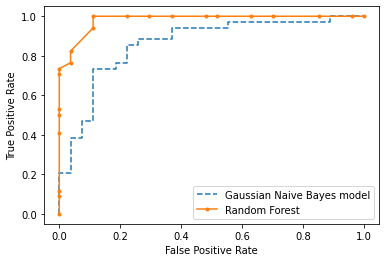

In [213]:
# calculate scores
svm_auc = roc_auc_score(y_test, svm_probs)
rf_auc = roc_auc_score(y_test, rf_probs)
# summarize scores
print('Gaussian Naive Bayes model: ROC AUC=%.3f' % (nb_auc))
print('Random Forest: ROC AUC=%.3f' % (rf_auc))
# calculate roc curves
nb_auc = roc_auc_score(y_test, nb_probs)
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)
# plot the roc curve for the model
pyplot.plot(nb_fpr, nb_tpr, linestyle='--', label='Gaussian Naive Bayes model')
pyplot.plot(rf_fpr, rf_tpr, marker='.', label='Random Forest')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()


#Neural network

In [214]:
from sklearn.neural_network import MLPClassifier

nn = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(12, 6), random_state=1)

nn.fit(X_train, y_train)

y_pred_nn = nn.predict(X_test)

nn_probs = nn.predict_proba(X_test)
nn_probs = nn_probs[:, 1]

#Classification accuracy for Neural network

In [215]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, y_pred_nn)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, y_pred_nn)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test,y_pred_nn)
print("Accuracy:",result2)

Confusion Matrix:
[[22  5]
 [ 4 30]]
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.81      0.83        27
           1       0.86      0.88      0.87        34

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61

Accuracy: 0.8524590163934426


#Comparison the performance of neutral network and random forest algorithm by AUC

neural network : ROC AUC=0.931
Random Forest: ROC AUC=0.982


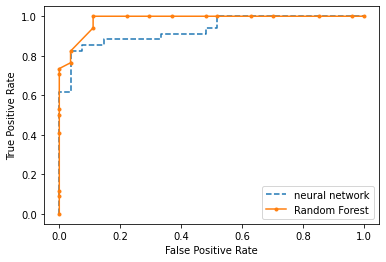

In [216]:
# calculate scores
nn_auc = roc_auc_score(y_test, nn_probs)
rf_auc = roc_auc_score(y_test, rf_probs)
# summarize scores
print('neural network : ROC AUC=%.3f' % (nn_auc))
print('Random Forest: ROC AUC=%.3f' % (rf_auc))
# calculate roc curves
nn_fpr, nn_tpr, _ = roc_curve(y_test, nn_probs)
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)
# plot the roc curve for the model
pyplot.plot(nn_fpr, nn_tpr, linestyle='--', label='neural network')
pyplot.plot(rf_fpr, rf_tpr, marker='.', label='Random Forest')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

#compare the performance of five classifiers by AUC

Support Vector Machine: ROC AUC=0.763
k nearest neighbor: ROC AUC=0.738
neural network : ROC AUC=0.931
Random Forest: ROC AUC=0.982
Gaussian Naive Bayes model: ROC AUC=0.861


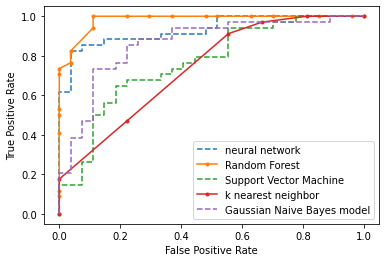

In [217]:
# calculate scores
nn_auc = roc_auc_score(y_test, nn_probs)
rf_auc = roc_auc_score(y_test, rf_probs)
svm_auc = roc_auc_score(y_test, svm_probs)
knn_auc = roc_auc_score(y_test, knn_probs)
nb_auc = roc_auc_score(y_test, nb_probs)

print('Support Vector Machine: ROC AUC=%.3f' % (svm_auc))
print('k nearest neighbor: ROC AUC=%.3f' % (knn_auc))
print('neural network : ROC AUC=%.3f' % (nn_auc))
print('Random Forest: ROC AUC=%.3f' % (rf_auc))
print('Gaussian Naive Bayes model: ROC AUC=%.3f' % (nb_auc))
# calculate roc curves

# plot the roc curve for the model
pyplot.plot(nn_fpr, nn_tpr, linestyle='--', label='neural network')
pyplot.plot(rf_fpr, rf_tpr, marker='.', label='Random Forest')
pyplot.plot(svm_fpr, svm_tpr, linestyle='--', label='Support Vector Machine')
pyplot.plot(knn_fpr, knn_tpr, marker='.', label='k nearest neighbor')
pyplot.plot(nb_fpr, nb_tpr, linestyle='--', label='Gaussian Naive Bayes model')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [218]:
def predict_heart_diease(age, sex, trestbps, chol, fbs, thalach, exang, oldpeak, ca, restecg, thal, slope, cp,):    
    
    X = new_df.drop(['target'],axis='columns')
    X.shape
    restecg_index = np.where(X.columns==restecg)[0][0]
    loc_thal = np.where(X.columns==thal)[0][0]
    loc_slope = np.where(X.columns==slope)[0][0]
    loc_cp = np.where(X.columns==cp)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = age
    x[1] = sex
    x[2] = trestbps
    x[3] = chol
    x[4] = fbs
    x[5] = thalach
    x[6] = exang
    x[7] = oldpeak
    x[8] = ca

    if restecg_index >= 0:
        x[restecg_index] = 1
    
    if loc_thal >= 0:
        x[loc_thal] = 1
    
    if loc_slope >= 0:
        x[loc_slope] = 1
    
    if loc_cp >= 0:
        x[loc_cp] = 1

    return nn.predict([x])[0]

In [219]:
predict_heart_diease(63 ,	1 ,	145 ,	233, 	1, 	150 ,	0, 	2.3 ,	0, "restecg_0","thal_1","slope_0","cp_3"	)

1

#Export the tested model to a pickle file


In [220]:
import pickle
with open('heart_diease_prediction_model.pickle','wb') as f:
    pickle.dump(nn,f)

#Export column information to a file that will be useful later on in our prediction application


In [221]:
X = new_df.drop(['target'],axis='columns')
X.shape
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))

